In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import carga_datos as cd
import importlib
importlib.reload(cd)



<module 'carga_datos' from 'c:\\Users\\ekkol\\OneDrive\\Escritorio\\RepositorioVario\\lab_intermedio\\modulos\\carga_datos.py'>

Carga de Datos

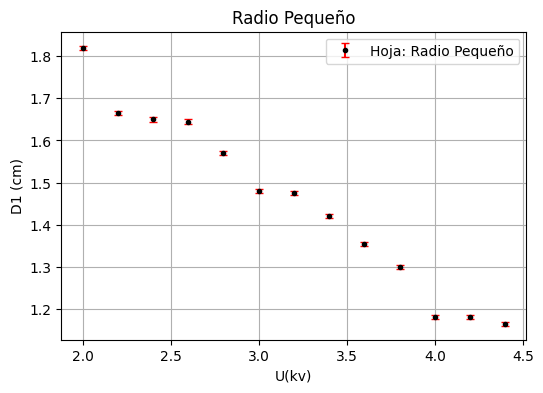

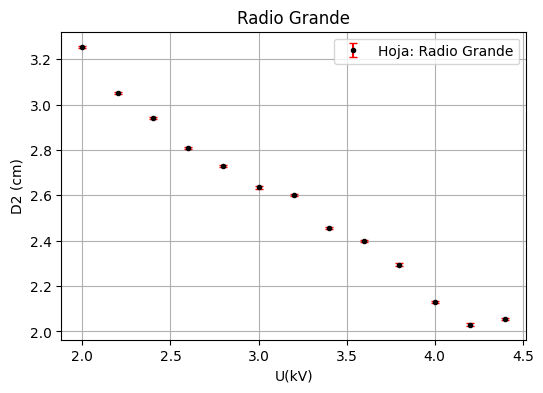

{'Radio Pequeño': {'x': array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4]), 'y': array([1.82 , 1.666, 1.65 , 1.645, 1.57 , 1.48 , 1.475, 1.42 , 1.355,
       1.3  , 1.18 , 1.18 , 1.165]), 'error': array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005]), 'name': 'Radio Pequeño'}, 'Radio Grande': {'x': array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4]), 'y': array([3.255, 3.05 , 2.94 , 2.81 , 2.73 , 2.635, 2.6  , 2.455, 2.4  ,
       2.295, 2.13 , 2.03 , 2.055]), 'error': array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005]), 'name': 'Radio Grande'}}


In [121]:

Data= cd.plot_excel_sheets(r"C:/Users/ekkol/OneDrive/Escritorio/RepositorioVario/lab_intermedio/difraccion_electrones/datos_difraccion_electrones.xlsx", False)
radio_pequeño = Data["Radio Pequeño"]
radio_grande = Data["Radio Grande"]
print(Data)


calculamos $\lambda_{\text{bragg}} = \frac{2d}{n} \sin \left[ \frac{1}{2} \tan^{-1} \left( \frac{D}{2L} \right) \right]$


In [58]:
V_radio_pequeño = radio_pequeño["y"] * 1000 #Voltaje en V
h = 6.62607015e-34 #Joules*segundos
m_e = 9.10938356e-31 #kg
e = 1.602176634e-19 #Coulombs10

def longitud_de_onda (V_v):
    l_broglie = (h / (np.sqrt(2 * m_e * e * V_v)))
    return l_broglie

def incer_lambda_broglie (V_v):
    incer_V = 0.1
    return h / (2*np.sqrt(2 * m_e * e * V_v**3)) * incer_V



Definimos la función de Ajuste y Extraemos los parámetros óptimos, la matriz de covarianza, y los valores de x e y adecuados

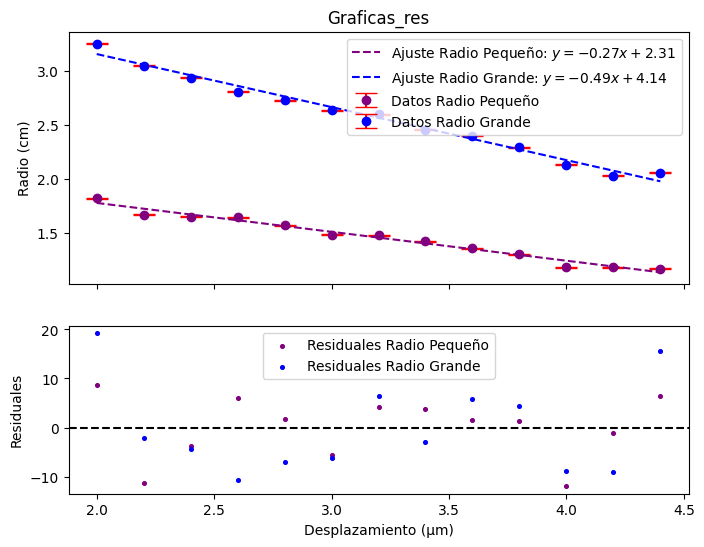

In [130]:

def fitting_function(x, m, b):
    return m * x + b

popt_p, pcov_p = curve_fit(fitting_function, radio_pequeño["x"], radio_pequeño["y"], sigma=radio_pequeño["error"])
popt_g, pcov_g = curve_fit(fitting_function, radio_grande["x"], radio_grande["y"], sigma=radio_grande["error"])

formula_text_p = r"$y = {:.2f}x + {:.2f}$".format(popt_p[0], popt_p[1])
formula_text_g = r"$y = {:.2f}x + {:.2f}$".format(popt_g[0], popt_g[1])

#cd.plot_fitted_curve(radio_pequeño["x"], radio_pequeño["y"], radio_pequeño["error"], fitting_function, popt_p, formula_text)
radio_pequeño["popt"]=popt_p
radio_pequeño["formula_text"] = formula_text_p
radio_grande["popt"]=popt_g
radio_grande["formula_text"]=formula_text_g
cd.plot_fitted_curve(fitting_function, False, "Graficas_res" ,dataset1= radio_pequeño, dataset2 = radio_grande)